# Added 50% of duplicates

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import duplicates_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

duplicates_utils.drop_negative_age(df)

## Adding duplicates

In [2]:
print('--------------------------------------')
duplicates_utils.print_duplicates_values(df) 

print(f'\nADDING 50% TO FEATURE \n')

df_dirty = duplicates_utils.duplicates_values(df, 50)
duplicates_utils.print_duplicates_values(df_dirty)

--------------------------------------
Number of rows:  9984
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 50% TO FEATURE 

Number of rows:  14976
Duplicate Counts:  4992
Percentage of Duplicate Values:  33.33333333333333


## Decision Tree

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5210
           1       0.97      0.99      0.98      5273

    accuracy                           0.98     10483
   macro avg       0.98      0.98      0.98     10483
weighted avg       0.98      0.98      0.98     10483

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2295
           1       0.95      1.00      0.97      2198

    accuracy                           0.97      4493
   macro avg       0.97      0.97      0.97      4493
weighted avg       0.98      0.97      0.97      4493

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4999
           1       0.96      0.99      0.98      4985

    accuracy                           0.98      9984


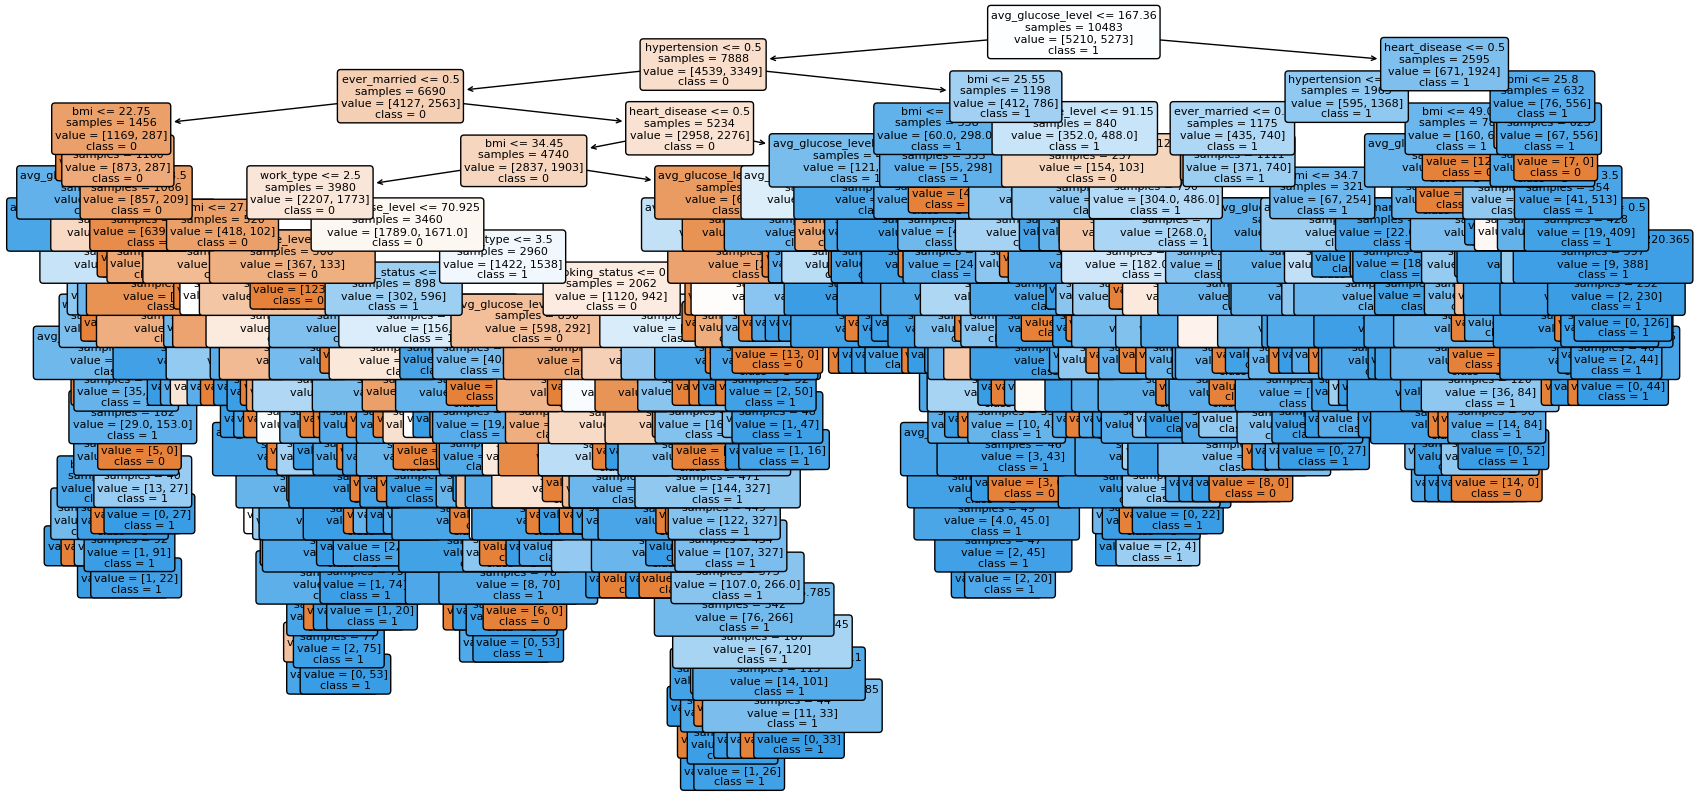

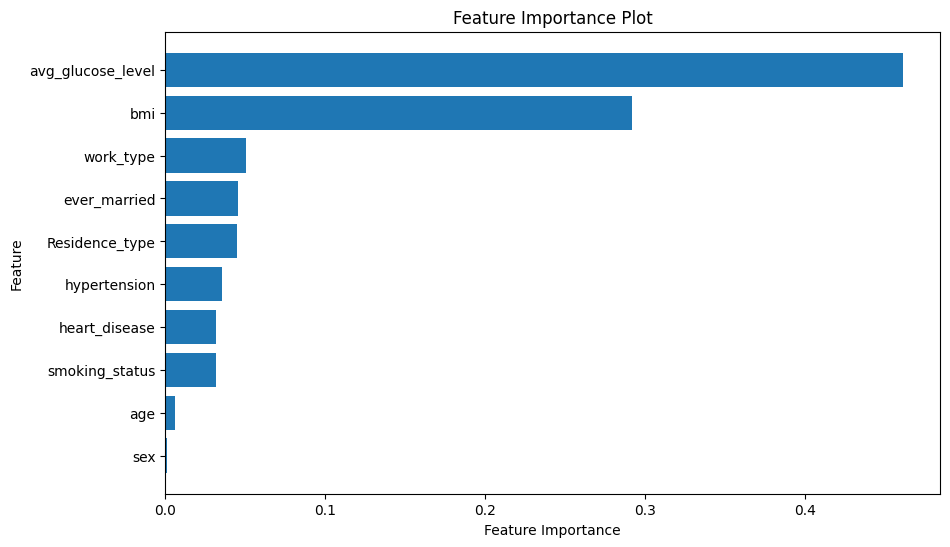

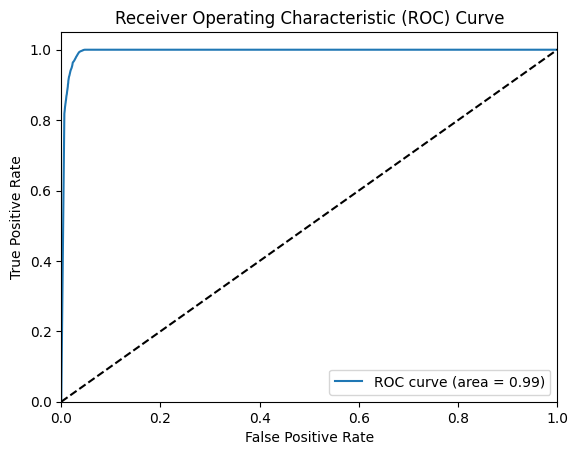

AUC Score: 0.9943886269731378


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9542421353670162, 0.9609151572926596, 0.9694947569113441, 0.9637404580152672, 0.9637404580152672, 0.9561068702290076, 0.9637404580152672, 0.9637404580152672, 0.9685114503816794, 0.976145038167939]
Mean accuracy: 0.9640377240410715
95% confidence interval: (0.9594800004744979, 0.968595447607645)


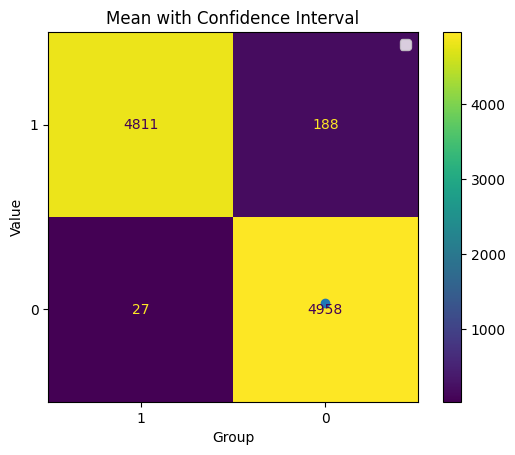

In [3]:
decision_tree = ML_algorithms.train_decision_tree_model(df_dirty, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_dirty)


## Hist Gradient Boosting Classifier

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 59.61352777481079
Best parameters found:  {'l2_regularization': 0.0, 'learning_rate': 0.2, 'max_depth': 5, 'max_iter': 257, 'min_samples_leaf': 12}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5210
           1       1.00      1.00      1.00      5273

    accuracy                           1.00     10483
   macro avg       1.00      1.00      1.00     10483
weighted avg       1.00      1.00      1.00     10483

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2295
           1       0.99      1.00      0.99      2198

    accuracy                           0.99      4493
   macro avg       0.99      0.99      0.99      4493
weighted avg       0.99      0.99      0.99      4493


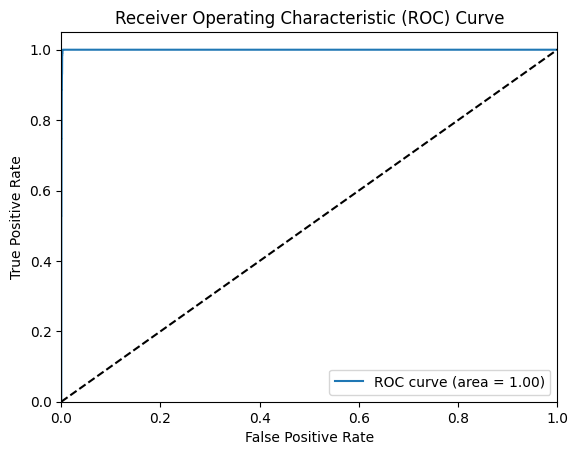

AUC Score: 0.9995241575897928


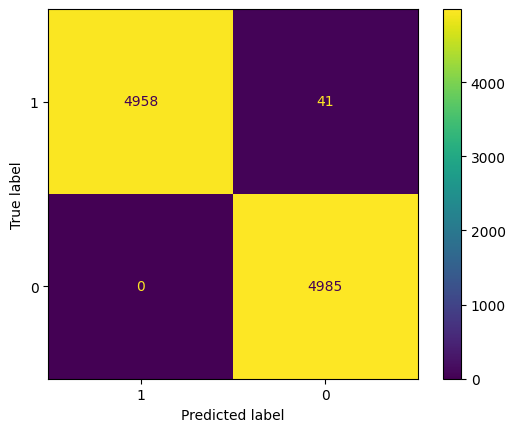

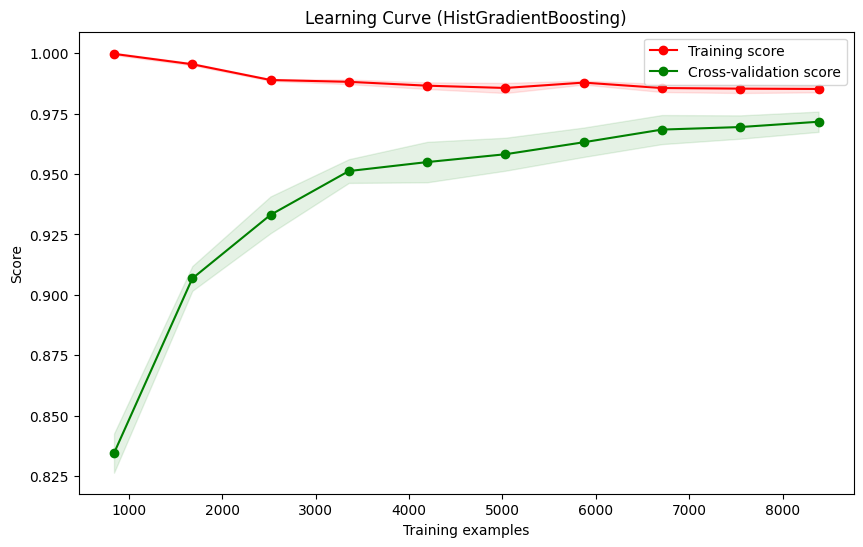

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9933269780743565, 0.994280266920877, 0.9895138226882746, 0.9885496183206107, 0.9923664122137404, 0.9885496183206107, 0.9914122137404581, 0.9914122137404581, 0.9895038167938931, 0.9942748091603053]
Mean accuracy: 0.9913189769973585
95% confidence interval: (0.9897275005228259, 0.9929104534718911)


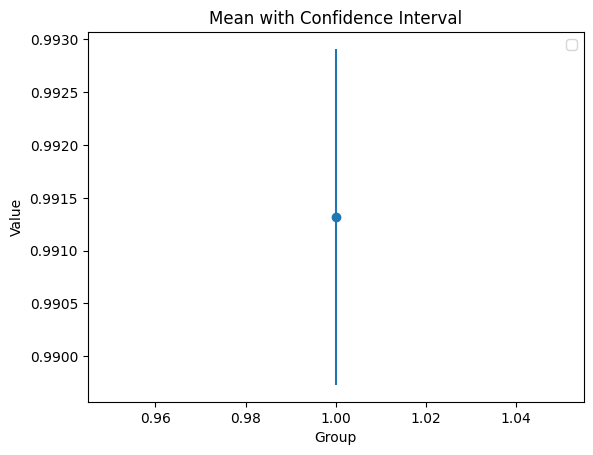

--------------------------------------


In [4]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_dirty, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb, df_dirty)

print('--------------------------------------')